In [ ]:
pip install underthesea gensim wordcloud matplotlib pyvi seaborn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import logging
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from underthesea import word_tokenize, pos_tag
from gensim.models import Word2Vec
from collections import Counter
from pyvi import ViTokenizer
import seaborn as sns

C:\Users\PHONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv("coopmart_review_sentiment.csv")
df

,comment,stars,sentiment
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,5,Trung tính
1,dịch vụ tốt,5,Tích cực
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính
3,nhân viên tính tiền thái độ khó chịu ra mặt,1,Tiêu cực
4,thật tuyệt,5,Tích cực
...,...,...,...
31751,tốt,4,Tích cực
31752,tốt,4,Tích cực
31753,tốt,4,Tích cực
31754,tuyệt,4,Tích cực


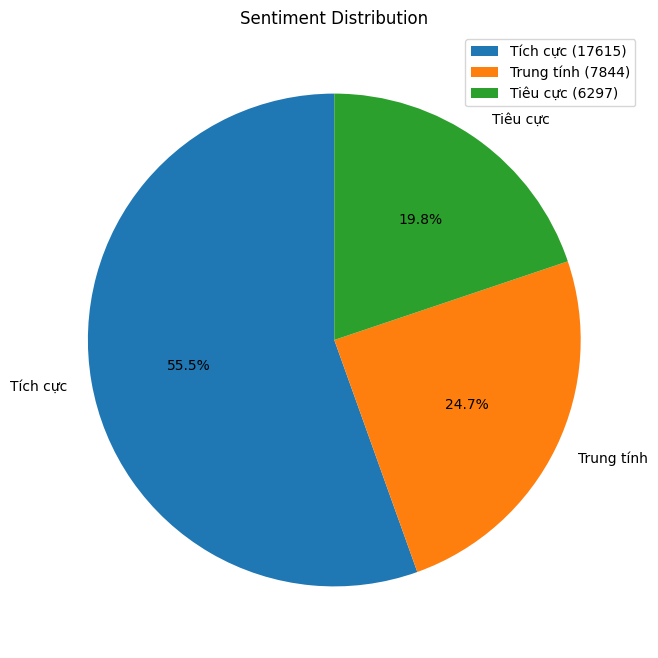

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')

# Add a legend with counts
legend_labels = [f'{label} ({count})' for label, count in zip(sentiment_counts.index, sentiment_counts.values)]
plt.legend(legend_labels, loc='best')


plt.show()


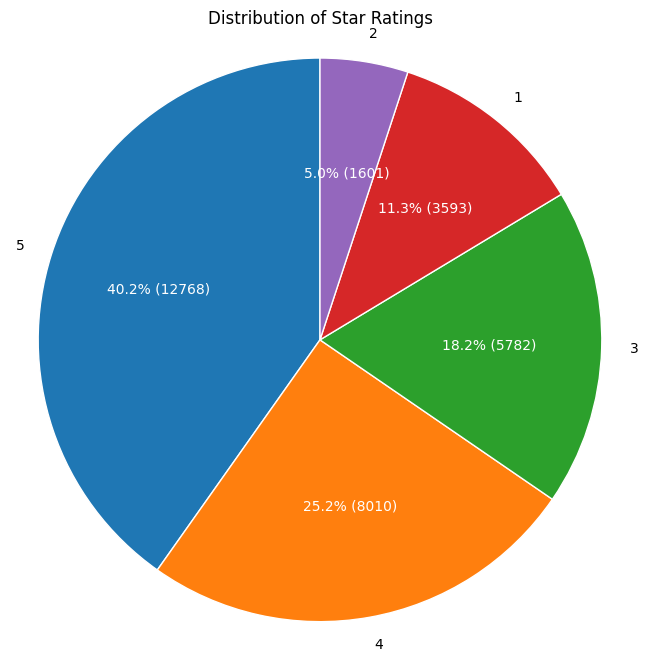

In [ ]:
# Count the occurrences of each star rating
star_counts = df['stars'].value_counts()

# Calculate percentages
star_percentages = (star_counts / star_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
patches, texts, autotexts = plt.pie(
    star_counts,
    labels=star_counts.index,
    autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(star_counts) / 100)})',  # Display percentage and count
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Customize the appearance (optional)
plt.title('Distribution of Star Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust label font size (optional)
for text in texts:
    text.set_fontsize(10)

# Adjust autotext font size and color (optional)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.show()


# Phân tích các bình luận tiêu cực, trung tính

In [ ]:
df1 = df[(df['sentiment'] =='Tiêu cực') | (df['sentiment'] == 'Trung tính')]['comment']
df1

0        nhiều hàng hoá để lựa chọn thường xuyên có chư...
2        hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...
3              nhân viên tính tiền thái độ khó chịu ra mặt
5        không gian mua sắm thoải mái khách vắng đi nhi...
6        hôm qua em có đến đây mua ít đồ bạn em bảo xin...
                               ...                        
31744                                             được rồi
31745                                             được rồi
31746                                             được rồi
31747                                             được rồi
31748                                                  đến
Name: comment, Length: 14141, dtype: object

In [ ]:
with open('vietnamese-stopwords-dash.txt', 'r', encoding='utf-8') as f1:
    stopword1 = f1.read()

with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as f2:
    stopword2 = f2.read()


In [ ]:
# tạo hàm loại bỏ stopwords bằng cách lấy các từ không nằm trong 2 từ điển stopwords
def remove_stopwords(line):
    words = []
    for word in line:
        if word not in stopword1:
            words.append(word)
        elif word not in stopword2:
            words.append(word)
    return ' '.join(words)

In [ ]:
 def wt(sentence):
    tokens = ViTokenizer.tokenize(sentence).split()
    return tokens

In [ ]:
df1 = df1.apply(wt)

In [ ]:
df1 = df1.apply(remove_stopwords)


In [ ]:
df1

0        hàng_hoá lựa_chọn thường_xuyên chương_trình kh...
2        hôm_nay tầm tiền quầy thu_ngân tầng bích trườn...
3                   nhân_viên tiền thái_độ khó_chịu ra_mặt
5        không_gian mua_sắm thoải_mái vắng gigamall mở_cửa
6        hôm_qua mua xinh chụp quầy cân qủa nhân_viên t...
                               ...                        
31744                                                     
31745                                                     
31746                                                     
31747                                                     
31748                                                     
Name: comment, Length: 14141, dtype: object

In [ ]:
# Loại bỏ các dòng mà giá trị là rỗng (""), hoặc chỉ có khoảng trắng
df1 = df1[df1.str.strip().astype(bool)]
df1

0        hàng_hoá lựa_chọn thường_xuyên chương_trình kh...
2        hôm_nay tầm tiền quầy thu_ngân tầng bích trườn...
3                   nhân_viên tiền thái_độ khó_chịu ra_mặt
5        không_gian mua_sắm thoải_mái vắng gigamall mở_cửa
6        hôm_qua mua xinh chụp quầy cân qủa nhân_viên t...
                               ...                        
31694                  cửa_hàng tiện_lợi lựa_chọn sản_phẩm
31696                                      khu vui_chơi vé
31697                           bố_trí hợp_lý lắm vừa_phải
31723            tắt dấu cuộc_gọi quê thực_sự vua báo_động
31726    cửa_hàng tạp_hoá tuyệt_vời thực_phẩm thông_thường
Name: comment, Length: 12657, dtype: object

# POS TAGGING

In [ ]:
# dùng hàm pos_tag để phân biệt đâu là danh từ, động từ, tính từ, ...
pos_negative = []
for i in df1:
  pos = pos_tag(str(i))
  pos_negative.append(pos)

In [ ]:
pos_negative

[[('hàng_hoá', 'N'),
  ('lựa_chọn', 'V'),
  ('thường_xuyên', 'N'),
  ('chương_trình', 'V'),
  ('khuyến_mãi', 'N'),
  ('nhân_viên', 'V'),
  ('vui_vẻ', 'N'),
  ('nhiệt_tình', 'M')],
 [('hôm_nay', 'V'),
  ('tầm', 'N'),
  ('tiền', 'N'),
  ('quầy', 'N'),
  ('thu_ngân', 'V'),
  ('tầng', 'N'),
  ('bích', 'N'),
  ('trường_hợp', 'V'),
  ('nhân_viên', 'N'),
  ('thái_độ', 'V'),
  ('ra_mặt', 'N'),
  ('vấn_đề', 'V'),
  ('vợ', 'N'),
  ('khách_hàng', 'V'),
  ('thẻ', 'N'),
  ('bạch_kim', 'V'),
  ('tiền', 'N'),
  ('lỗ', 'N'),
  ('tai ngoáy', 'V'),
  ('tận', 'E'),
  ('tiền', 'N'),
  ('quăng', 'V'),
  ('món', 'N'),
  ('hàng', 'N'),
  ('chúng_tôi', 'V'),
  ('thái_độ', 'N'),
  ('khó_chịu', 'V'),
  ('tiếng', 'N'),
  ('nói_chung', 'V'),
  ('thái_độ', 'V'),
  ('nhân_viên', 'N'),
  ('thấp_kém', 'V'),
  ('văn_hoá', 'N'),
  ('chúng_tôi', 'V'),
  ('mua', 'V'),
  ('hàng', 'N'),
  ('cảm_xúc', 'N'),
  ('tiêu_cực', 'N'),
  ('như_vậy', 'V'),
  ('hình_ảnh mong', 'N'),
  ('đọc', 'V'),
  ('ráng', 'V'),
  ('cải_thiện', 'V

In [ ]:
# lọc ra các danh từ
nouns = []

for sentence in pos_negative:
    for word, tag in sentence:
        if tag == 'N':
            nouns.append(word)
nouns


['hàng_hoá',
 'thường_xuyên',
 'khuyến_mãi',
 'vui_vẻ',
 'tầm',
 'tiền',
 'quầy',
 'tầng',
 'bích',
 'nhân_viên',
 'ra_mặt',
 'vợ',
 'thẻ',
 'tiền',
 'lỗ',
 'tiền',
 'món',
 'hàng',
 'thái_độ',
 'tiếng',
 'nhân_viên',
 'văn_hoá',
 'hàng',
 'cảm_xúc',
 'tiêu_cực',
 'hình_ảnh mong',
 'tiền',
 'khó_chịu',
 'không_gian',
 'thoải_mái',
 'gigamall',
 'hôm_qua',
 'xinh',
 'quầy',
 'quả',
 'nhân_viên',
 'kiểu',
 'thắc_mắc',
 'siêu_thị',
 'đòồ',
 'thái_độ',
 'cân',
 'môi',
 'mood',
 'tiếp_theo',
 'lốc',
 'sữa',
 'tiền',
 'lầu',
 'nhân_viên',
 'kiu',
 'cỡ',
 'tiền',
 'tiền',
 'xin_lỗi',
 'đào_tạo',
 'nhân_viên',
 'khâu',
 'khách_hàng',
 'máy_in',
 'thanh_toán phiếu',
 'sdt',
 'xếp_hàng',
 'thái_độ',
 'khó_chịu',
 'tiền',
 'sdt',
 'im im',
 'tiếng',
 'thái_độ',
 'đông',
 'khách_vậy',
 'coop',
 'thái_độ',
 'quầy',
 'quầy',
 'tiền',
 'nói_chuyện',
 'hợp_tác_xã',
 'phường',
 'đơn_lập siêu_thị',
 'lựa_chọn',
 'mặt_hàng',
 'vải',
 'hàng',
 'hợp_lý',
 'trà',
 'món',
 'công_nghiệp',
 'giá_cả',
 'quan_tr

In [ ]:
# lọc ra các động từ
verbs = []

for sentence in pos_negative:
    for word, tag in sentence:
        if tag == 'V':
            verbs.append(word)
verbs

['lựa_chọn',
 'chương_trình',
 'nhân_viên',
 'hôm_nay',
 'thu_ngân',
 'trường_hợp',
 'thái_độ',
 'vấn_đề',
 'khách_hàng',
 'bạch_kim',
 'tai ngoáy',
 'quăng',
 'chúng_tôi',
 'khó_chịu',
 'nói_chung',
 'thái_độ',
 'thấp_kém',
 'chúng_tôi',
 'mua',
 'như_vậy',
 'đọc',
 'ráng',
 'cải_thiện',
 'giúp',
 'nhân_viên',
 'thái_độ',
 'mua_sắm',
 'mua',
 'chụp',
 'cân',
 'thái_độ',
 'chụp',
 'liếc',
 'liếc',
 'cấm',
 'chụp',
 'chụp',
 'mua',
 'mắc',
 'liếc',
 'bỉu',
 'omg',
 'tụt',
 'kinh_khủng',
 'mua',
 'fami',
 'khuyến_mãi',
 'đợi',
 'gửi',
 'kêu',
 'ký_tên',
 'hoàn_toàn',
 'đề_nghị',
 'tất_cả',
 'chăm_sóc',
 'phiếu tích',
 'đọc',
 'trả_lời',
 'nhắc',
 'xếp_hàng',
 'mua',
 'nhắc',
 'khó_chịu',
 'mong',
 'xem_lại',
 'nhân_viên',
 'bỏ_qua',
 'sdt',
 'lanh',
 'quần_áo',
 'tạp_hoá',
 'cà_phê',
 'hợp_lý',
 'mua',
 'ngạc_nhiên',
 'phong_phú',
 'vật_chất',
 'nhân_viên',
 'thu_ngân',
 'có_lẽ tệ',
 'hoá_đơn',
 'yêu_cầu',
 'giao',
 'thô_lỗ',
 'siêu_thị',
 'nhà_nước',
 'tuyển',
 'nhân_viên',
 'linh_hoạt'

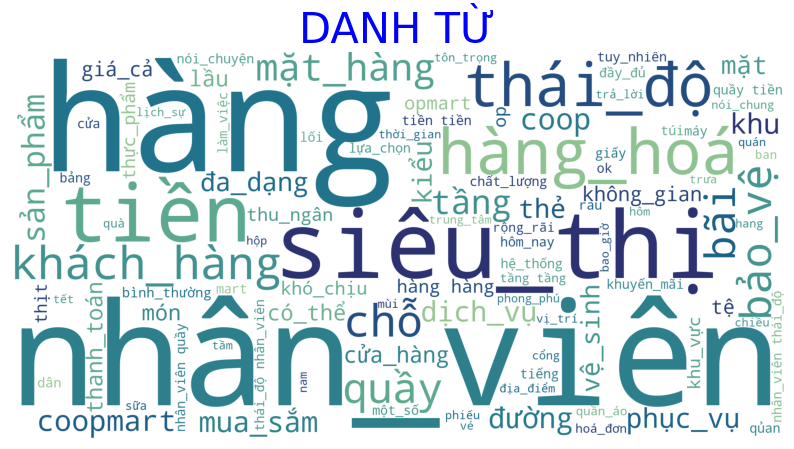

In [ ]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = " ".join(nouns)


# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('DANH TỪ', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()


In [ ]:
# Bước 2: Đếm tần suất
noun_counts = Counter(nouns)

# In kết quả
print(noun_counts)

Counter({'hàng': 2015, 'nhân_viên': 1957, 'siêu_thị': 1531, 'tiền': 1483, 'thái_độ': 791, 'hàng_hoá': 694, 'quầy': 692, 'chỗ': 588, 'tầng': 570, 'khách_hàng': 496, 'bãi': 496, 'mặt_hàng': 465, 'bảo_vệ': 437, 'khu': 397, 'sản_phẩm': 309, 'coop': 285, 'phục_vụ': 280, 'đa_dạng': 271, 'đường': 254, 'mua_sắm': 253, 'coopmart': 247, 'thẻ': 246, 'dịch_vụ': 235, 'kiểu': 225, 'lầu': 217, 'món': 211, 'giá_cả': 192, 'mặt': 190, 'thu_ngân': 188, 'cửa_hàng': 188, 'vệ_sinh': 186, 'thanh_toán': 183, 'có_thể': 178, 'không_gian': 176, 'rau': 176, 'op': 162, 'mart': 156, 'dân': 153, 'thịt': 149, 'khó_chịu': 145, 'opmart': 145, 'đầy_đủ': 144, 'thực_phẩm': 142, 'túi': 132, 'khu_vực': 127, 'bình_thường': 126, 'nói_chuyện': 125, 'khuyến_mãi': 120, 'tiếng': 120, 'máy': 118, 'hệ_thống': 115, 'cửa': 115, 'bảng': 110, 'qủan': 109, 'hang': 108, 'hôm_nay': 107, 'làm_việc': 106, 'chất_lượng': 104, 'giấy': 104, 'lối': 103, 'quà': 101, 'lựa_chọn': 100, 'một_số': 99, 'ok': 99, 'nam': 98, 'sữa': 96, 'ban': 96, 'tuy_nh

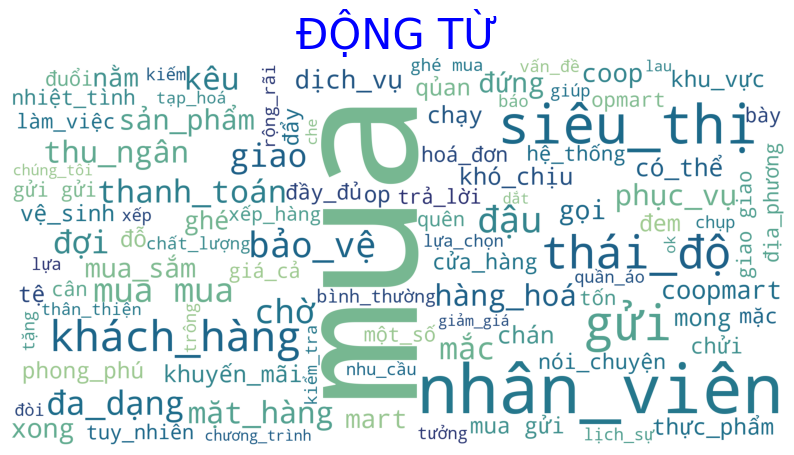

In [ ]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = " ".join(verbs)


# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('ĐỘNG TỪ', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()


In [ ]:
# Bước 2: Đếm tần suất
verb_counts = Counter(verbs)

# In kết quả
print(verb_counts)

Counter({'mua': 2188, 'nhân_viên': 1005, 'gửi': 739, 'siêu_thị': 577, 'thái_độ': 467, 'giao': 402, 'khách_hàng': 368, 'đậu': 314, 'chờ': 237, 'gọi': 231, 'bảo_vệ': 226, 'đợi': 217, 'đứng': 217, 'đa_dạng': 208, 'thanh_toán': 194, 'ghé': 193, 'kêu': 191, 'mắc': 190, 'mặt_hàng': 187, 'xong': 180, 'thu_ngân': 174, 'hàng_hoá': 171, 'nằm': 168, 'phục_vụ': 162, 'sản_phẩm': 154, 'mua_sắm': 145, 'mart': 132, 'dịch_vụ': 127, 'mong': 126, 'coop': 126, 'coopmart': 118, 'chán': 114, 'có_thể': 111, 'khó_chịu': 110, 'đem': 105, 'khuyến_mãi': 104, 'chạy': 104, 'qủan': 102, 'đỗ': 100, 'tốn': 98, 'mặc': 93, 'vệ_sinh': 92, 'khu_vực': 91, 'thực_phẩm': 91, 'op': 91, 'chửi': 91, 'phong_phú': 89, 'nói_chuyện': 87, 'tặng': 86, 'cửa_hàng': 85, 'đầy_đủ': 81, 'đẩy': 79, 'nhiệt_tình': 74, 'hoá_đơn': 72, 'giá_cả': 69, 'làm_việc': 69, 'chụp': 68, 'opmart': 67, 'tuy_nhiên': 66, 'hệ_thống': 65, 'một_số': 64, 'bày': 63, 'trả_lời': 62, 'quên': 62, 'địa_phương': 60, 'đuổi': 60, 'cân': 59, 'chất_lượng': 57, 'xếp_hàng': 5

In [ ]:
df2 = df['comment']
df2

0        nhiều hàng hoá để lựa chọn thường xuyên có chư...
1                                              dịch vụ tốt
2        hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...
3              nhân viên tính tiền thái độ khó chịu ra mặt
4                                               thật tuyệt
                               ...                        
31751                                                  tốt
31752                                                  tốt
31753                                                  tốt
31754                                                tuyệt
31755                                                  tốt
Name: comment, Length: 31756, dtype: object

In [ ]:
df2 = df['comment']
tokenized_data = df2.to_list()
tokenized_data = [word_tokenize(cmt, format="text").split() for cmt in tokenized_data]

In [ ]:
tokenized_data

[['nhiều',
  'hàng',
  'hóa',
  'để',
  'lựa_chọn',
  'thường_xuyên',
  'có',
  'chương_trình',
  'khuyến_mãi',
  'nhân_viên',
  'vui_vẻ',
  'nhiệt_tình'],
 ['dịch_vụ', 'tốt'],
 ['hôm_nay',
  'ngày',
  'lúc',
  'tầm',
  'giờ',
  'giờ',
  'tôi',
  'tính',
  'tiền',
  'ở',
  'quầy',
  'thu',
  'ngân_tầng',
  'trệt',
  'tên',
  'là',
  'bích',
  'tôi',
  'gặp',
  'trường_hợp',
  'như',
  'sau',
  'chị',
  'nhân_viên',
  'thái_độ',
  'với',
  'khách',
  'với',
  'tôi',
  'ra_mặt',
  'luôn',
  'không',
  'hiểu',
  'chị',
  'gặp',
  'vấn_đề',
  'gì',
  'nữa',
  'chắc',
  'tới',
  'tháng',
  'vợ',
  'tôi',
  'là',
  'khách_hàng',
  'thẻ',
  'bạch_kim',
  'không',
  'nhiều',
  'cũng',
  'không',
  'ít',
  'trong',
  'lúc',
  'tính',
  'tiền',
  'không',
  'hiểu',
  'lỗ_tai',
  'chị',
  'có',
  'bị',
  'tật',
  'hay',
  'chưa',
  'ngoáy',
  'hỏi',
  'cùng',
  'câu',
  'hỏi',
  'tới',
  'tận',
  'lần',
  'mà',
  'đến',
  'câu',
  'hỏi',
  'lúc',
  'tính',
  'tiền',
  'thì',
  'chị',
  'đó',
  'q

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, workers=4, sg=1)

2025-05-08 12:14:21,232 : INFO : collecting all words and their counts
2025-05-08 12:14:21,233 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-05-08 12:14:21,249 : INFO : PROGRESS: at sentence #10000, processed 119501 words, keeping 7495 word types
2025-05-08 12:14:21,265 : INFO : PROGRESS: at sentence #20000, processed 256514 words, keeping 12037 word types
2025-05-08 12:14:21,282 : INFO : PROGRESS: at sentence #30000, processed 395904 words, keeping 15725 word types
2025-05-08 12:14:21,284 : INFO : collected 15958 word types from a corpus of 407261 raw words and 31756 sentences
2025-05-08 12:14:21,285 : INFO : Creating a fresh vocabulary
2025-05-08 12:14:21,316 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 15958 unique words (100.00% of original 15958, drops 0)', 'datetime': '2025-05-08T12:14:21.315700', 'gensim': '4.3.3', 'python': '3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]', 'platfor

In [ ]:
len(model.wv.key_to_index)

15958

In [ ]:
model.wv.similar_by_word("hàng")

[('hàng_không', 0.8525159358978271),
 ('do_đó', 0.7883402109146118),
 ('vận_chuyển', 0.7808172702789307),
 ('đơn_từ', 0.7759646773338318),
 ('sắp_xếp_hàng', 0.7689088582992554),
 ('ngành_hàng', 0.7680623531341553),
 ('mẫu_mã', 0.7630873322486877),
 ('hàg', 0.7594588994979858),
 ('chủng_loại', 0.7517547011375427),
 ('có_mặt_hàng', 0.7492908835411072)]

In [ ]:
model.wv.similar_by_word("nhân_viên")

[('anh_chị', 0.8089873194694519),
 ('nhan_viên', 0.8065190315246582),
 ('sẵn_sàng', 0.8007662296295166),
 ('lễ_phép', 0.8006221652030945),
 ('chuyên_nghiệp', 0.7929118871688843),
 ('chỉ_dẫn', 0.7926245331764221),
 ('niềm_nở', 0.7898274064064026),
 ('nhận_viên', 0.7887156009674072),
 ('hướng_dẫn', 0.7883978486061096),
 ('tác_phong', 0.7863073945045471)]

In [ ]:
model.wv.similar_by_word("gửi")

[('gởi', 0.9067323803901672),
 ('giữ', 0.9057676196098328),
 ('giử', 0.8646858334541321),
 ('vnđ', 0.839126706123352),
 ('vnd', 0.8325685858726501),
 ('nhà_xe', 0.8300158977508545),
 ('tốn_phí', 0.8262227177619934),
 ('dựng', 0.8203667402267456),
 ('bải', 0.8177200555801392),
 ('free', 0.8147669434547424)]

In [ ]:
# from transformers import AutoTokenizer, AutoModel
# from underthesea import word_tokenize
# import torch
# from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
# model = AutoModel.from_pretrained("vinai/phobert-base")


In [ ]:
# def get_phobert_vector(tokenized_text):
#     input_ids = tokenizer.encode(tokenized_text, return_tensors='pt')

#     with torch.no_grad():
#         outputs = model(input_ids)
#         last_hidden_state = outputs.last_hidden_state

#     return last_hidden_state.mean(dim=1).squeeze()  # Vector có shape: [768]


In [ ]:
# def find_similar_words_in_comments(target_word, comments, top_k=5):
#     # Lấy vector của từ mục tiêu ("nhân viên")
#     target_vec = get_phobert_vector(target_word).reshape(1, -1)

#     # Lưu trữ các từ trong các bình luận
#     words = []
#     word_vectors = []

#     # Tokenize và lấy vector cho mỗi từ trong các bình luận
#     for comment in comments:
#         tokens = comment.split()  # Giả sử bạn đã tokenized các câu này rồi
#         for token in tokens:
#             word_vec = get_phobert_vector(token).reshape(1, -1)
#             words.append(token)
#             word_vectors.append(word_vec)

#     # Tính cosine similarity giữa từ mục tiêu và các từ trong bình luận
#     sims = []
#     for word, word_vec in zip(words, word_vectors):
#         score = cosine_similarity(target_vec, word_vec)[0][0]
#         sims.append((word, score))

#     # Sắp xếp theo độ tương đồng giảm dần và lấy top_k kết quả
#     sims = sorted(sims, key=lambda x: x[1], reverse=True)

#     # Lọc bỏ các từ trùng lặp (giữ lại từ đầu tiên có độ tương đồng cao nhất)
#     seen_words = set()
#     filtered_sims = []
#     for word, score in sims:
#         if word not in seen_words:
#             seen_words.add(word)
#             filtered_sims.append((word, score))

#     # Trả về top_k kết quả sau khi đã lọc trùng lặp
#     return filtered_sims[:top_k]


In [ ]:
# df3 = df2.tolist()

In [ ]:
# similar_words = find_similar_words_in_comments("nhân_viên", df3, top_k=10)

# # In kết quả
# for word, score in similar_words:
#     print(f"{word}: {score}")

# Tìm những tính từ mô tả các chủ đề khiến khách hàng đánh giá không tốt

In [ ]:
df3 = df[(df['sentiment'] =='Tiêu cực') | (df['sentiment'] == 'Trung tính')]['comment']
df3

0        nhiều hàng hoá để lựa chọn thường xuyên có chương trình khuyến mãi...
2        hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng tr...
3                                  nhân viên tính tiền thái độ khó chịu ra mặt
5        không gian mua sắm thoải mái khách vắng đi nhiều so với trước khi ...
6        hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài ...
                                         ...                                  
31744                                                                 được rồi
31745                                                                 được rồi
31746                                                                 được rồi
31747                                                                 được rồi
31748                                                                      đến
Name: comment, Length: 14141, dtype: object

## NHÂN VIÊN

In [ ]:
nhan_vien = df3[df3.apply(wt).apply(lambda tokens: "nhân_viên" in tokens)]
nhan_vien

0        nhiều hàng hoá để lựa chọn thường xuyên có chương trình khuyến mãi...
2        hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng tr...
3                                  nhân viên tính tiền thái độ khó chịu ra mặt
6        hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài ...
8        máy in phiếu tích điểm hư mình tới thanh toán và hỏi mình không ph...
                                         ...                                  
31030                            khu vực rộng rãi nhân viên phục vụ nhiệt tình
31040              cho sao nhưng nhân viên phục vụ mặt có vẻ hơi căng lotreria
31449                                        nhỏ nhân viên chưa thân thiện lắm
31668    để thời gian giờ mà bửa mình qua là giờ đóng cửa hết rồi nhân viên...
31672                     hàng đa dạng nhưng nhân viên thu ngân quá ít và chậm
Name: comment, Length: 2321, dtype: object

In [ ]:
for idx, comment in nhan_vien.head(10).items():
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')


Bình luận: nhiều hàng hoá để lựa chọn thường xuyên có chương trình khuyến mãi nhân viên vui vẻ nhiệt tình
---------------------------------------------------------------------------
Bình luận: hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng trệt tên là bích tôi gặp trường hợp như sau chị nhân viên thái độ với khách với tôi ra mặt luôn không hiểu chị gặp vấn đề gì nữa chắc tới tháng vợ tôi là khách hàng thẻ bạch kim không nhiều cũng không ít trong lúc tính tiền không hiểu lỗ tai chị có bị tật hay chưa ngoáy hỏi cùng câu hỏi tới tận lần mà đến câu hỏi lúc tính tiền thì chị đó quăng những món hàng chúng tôi với thái độ rất khó chịu nghe tiếng luôn mà nói chung thái độ nhân viên thấp kém vô văn hoá không hiểu sao chúng tôi đã mua hàng và rồi bị thêm những cảm xúc tiêu cực như vậy vì lần đầu tôi sẽ không đưa hình ảnh chị lên mong chị đọc được thì ráng mà cải thiện giúp
---------------------------------------------------------------------------
Bình luận: nhân viên tính tiền 

In [ ]:
nhan_vien = nhan_vien.apply(wt)
nhan_vien = nhan_vien.apply(remove_stopwords)


In [ ]:
# dùng hàm pos_tag để phân biệt đâu là danh từ, động từ, tính từ, ...
pos_nv = []
for i in nhan_vien:
  pos = pos_tag(str(i))
  pos_nv.append(pos)

In [ ]:
# lọc ra các danh từ
nv_a = []

for sentence in pos_nv:
    for word, tag in sentence:
        if tag == 'A' :
            nv_a.append(word)
nv_a


['sai',
 'nóng',
 'vắng',
 'cong',
 'kém',
 'đông',
 'đông',
 'trẻ',
 'trắng',
 'rộng',
 'cg',
 'cong',
 'đục',
 'ngang',
 'sai',
 'nhẹ',
 'mệt',
 'đông',
 'đông',
 'vàng',
 'tạm',
 'thái_độ tệ',
 'sát',
 'xanh',
 'kín',
 'đỏ',
 'sạch',
 'bẩn',
 'chậm',
 'sai',
 'hiếm',
 'kém',
 'kém',
 'đông',
 'rộng',
 'tươi',
 'ngon',
 'rộng',
 'rộng',
 'cận',
 'đông',
 'lạnh',
 'lạnh',
 'trả_lời',
 'bạch_kim',
 'ngang',
 'ngon',
 'nhân_viên',
 'nhiệt_tình',
 'bẩn',
 'sạch',
 'đẹp',
 'nhân_viên',
 'thẳng',
 'mệt',
 'rộng',
 'kém',
 'rộng',
 'ngang',
 'sạch',
 'thủng',
 'bẩn',
 'lịch_sự',
 'tạm',
 'đông',
 'bề_bộn',
 'rẻ',
 'chuyên_nghiệp',
 'sâu',
 'siu',
 'rộng',
 'rẻ',
 'rộng',
 'móp',
 'tạm',
 'rẻ',
 'yếu',
 'ngắn',
 'suốt',
 'rát',
 'cổ_họng',
 'chậm',
 'sẵn',
 'thẳng',
 'trẻ',
 'haiz',
 'ngang',
 'đông',
 'free',
 'đẹp',
 'tạm',
 'opmart',
 'đông',
 'đông',
 'kém',
 'siêu_thị',
 'dại',
 'dại',
 'sẵn',
 'dơ',
 'thiện_cảm',
 'kém',
 'kém',
 'ngang',
 'kém',
 'mệt_mỏi',
 'mệt',
 'đông',
 'chậm',
 

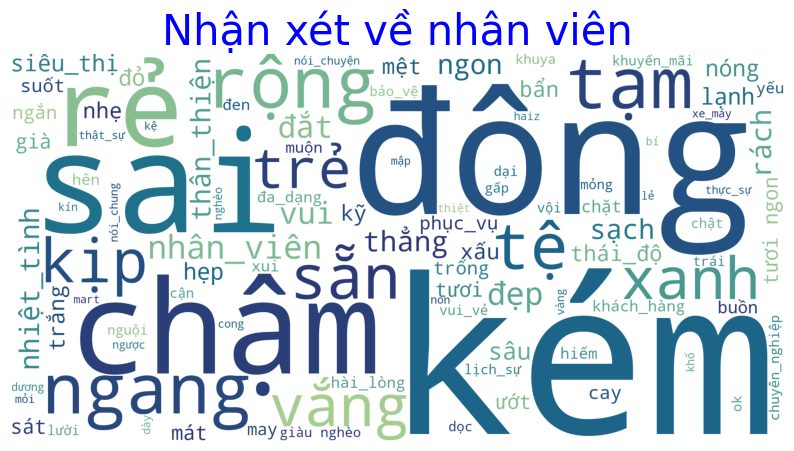

In [ ]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = " ".join(nv_a)


# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('Nhận xét về nhân viên', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()


In [ ]:
# Bước 2: Đếm tần suất
nv_counts = Counter(nv_a)

# In kết quả
print(nv_counts)

Counter({'kém': 155, 'đông': 88, 'sai': 58, 'chậm': 49, 'rẻ': 33, 'rộng': 32, 'tạm': 32, 'ngang': 31, 'sẵn': 24, 'kịp': 23, 'vắng': 22, 'xanh': 22, 'tệ': 22, 'trẻ': 20, 'ngon': 20, 'nhân_viên': 18, 'đẹp': 18, 'đắt': 17, 'vui': 16, 'tươi': 14, 'thẳng': 14, 'rách': 14, 'sạch': 13, 'nhiệt_tình': 13, 'thân_thiện': 12, 'sâu': 10, 'nóng': 9, 'đỏ': 9, 'lạnh': 9, 'hẹp': 9, 'trắng': 8, 'nhẹ': 8, 'mệt': 8, 'bẩn': 8, 'xấu': 8, 'kỹ': 8, 'sát': 7, 'siêu_thị': 7, 'thái_độ': 7, 'mát': 7, 'ướt': 7, 'già': 7, 'ngắn': 6, 'suốt': 6, 'trống': 6, 'cay': 5, 'may': 5, 'nghèo': 5, 'chặt': 5, 'buồn': 5, 'hiếm': 4, 'yếu': 4, 'hài_lòng': 4, 'phục_vụ': 4, 'đa_dạng': 4, 'khách_hàng': 4, 'xui': 4, 'hên': 4, 'đen': 4, 'muộn': 4, 'cận': 3, 'lịch_sự': 3, 'chuyên_nghiệp': 3, 'dại': 3, 'dọc': 3, 'khuya': 3, 'lười': 3, 'giàu': 3, 'ok': 3, 'vội': 3, 'bảo_vệ': 3, 'trái': 3, 'chật': 3, 'gấp': 3, 'vui_vẻ': 3, 'mỏng': 3, 'nguội': 3, 'cong': 2, 'vàng': 2, 'kín': 2, 'haiz': 2, 'ngược': 2, 'thiệt': 2, 'mart': 2, 'nói_chuyện': 2,

## HÀNG HÓA

In [ ]:
import re
hang = df3[df3.apply(wt).apply(lambda tokens: "hàng" in tokens or "hàng_hóa" in tokens)]
hang


2        hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng tr...
13       nhiều lựa chọn mặt hàng vải lanh quần áo hàng tạp hoá với giá rất ...
18       nhân viên thu ngân ở coopmart cong quynh có lẽ là người tệ nhất mà...
20       nhân viên tính tiền không linh hoạt chủ nhật không đủ nhân viên th...
65       dịch vụ gửi xe rất tệ sáng hôm nay mình gửi xe trong siêu thị vừa ...
                                         ...                                  
31666    chỗ này thấy vắng khách lắm chỗ thực phẩm tươi sống chỉ có hàng đó...
31668    để thời gian giờ mà bửa mình qua là giờ đóng cửa hết rồi nhân viên...
31671    hàng hoá chưa được đa dạng bằng các coop lớn khác một số quầy hàng...
31672                     hàng đa dạng nhưng nhân viên thu ngân quá ít và chậm
31685                                                                  ít hàng
Name: comment, Length: 1499, dtype: object

In [ ]:
for idx, comment in hang.head(10).items():
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')


Bình luận: hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng trệt tên là bích tôi gặp trường hợp như sau chị nhân viên thái độ với khách với tôi ra mặt luôn không hiểu chị gặp vấn đề gì nữa chắc tới tháng vợ tôi là khách hàng thẻ bạch kim không nhiều cũng không ít trong lúc tính tiền không hiểu lỗ tai chị có bị tật hay chưa ngoáy hỏi cùng câu hỏi tới tận lần mà đến câu hỏi lúc tính tiền thì chị đó quăng những món hàng chúng tôi với thái độ rất khó chịu nghe tiếng luôn mà nói chung thái độ nhân viên thấp kém vô văn hoá không hiểu sao chúng tôi đã mua hàng và rồi bị thêm những cảm xúc tiêu cực như vậy vì lần đầu tôi sẽ không đưa hình ảnh chị lên mong chị đọc được thì ráng mà cải thiện giúp
---------------------------------------------------------------------------
Bình luận: nhiều lựa chọn mặt hàng vải lanh quần áo hàng tạp hoá với giá rất hợp lý rẻ hơn ở nếu bạn muốn mang về trà cà phê và các món ăn công nghiệp khác hãy đến đây không có hoặc ít đồ thủ công
----------------

In [ ]:
hang = hang.apply(wt)
hang = hang.apply(remove_stopwords)


In [ ]:
# dùng hàm pos_tag để phân biệt đâu là danh từ, động từ, tính từ, ...
pos_h = []
for i in hang:
  pos = pos_tag(str(i))
  pos_h.append(pos)

In [ ]:
# lọc ra các danh từ
h_a = []

for sentence in pos_h:
    for word, tag in sentence:
        if tag == 'A' :
            h_a.append(word)
h_a


['rẻ',
 'cong',
 'người_nhà',
 'cg',
 'vắng',
 'cong',
 'đục',
 'kém',
 'sai',
 'đông',
 'đông',
 'vàng',
 'tạm',
 'thái_độ tệ',
 'sát',
 'xanh',
 'kín',
 'đỏ',
 'trắng',
 'vắng',
 'chậm',
 'rộng',
 'tươi',
 'ngon',
 'rộng',
 'rộng',
 'sai',
 'rẻ',
 'khắp',
 'bạch_kim',
 'đầy_đủ',
 'vừa_ý',
 'nhẹ',
 'nhẹ',
 'kém',
 'xanh',
 'siêu_thị',
 'ngang',
 'sạch',
 'thủng',
 'bẩn',
 'đắt',
 'mát',
 'vui',
 'ok',
 'đông',
 'tạm',
 'đông',
 'rẻ',
 'tươi',
 'ngon',
 'rẻ',
 'xanh',
 'tươi',
 'ngon',
 'đông',
 'thẳng',
 'đông',
 'sâu',
 'siu',
 'tươi',
 'ngon',
 'đông',
 'rộng',
 'rẻ',
 'móp',
 'chật',
 'ngon',
 'rẻ',
 'chuyên',
 'rẻ',
 'yếu',
 'suốt',
 'rát',
 'cổ_họng',
 'chậm',
 'hẹp',
 'thẳng',
 'đỏ',
 'phụ_trách',
 'tệ',
 'đông',
 'tạm',
 'rẻ',
 'rẻ',
 'đông',
 'vắng',
 'siêu_thị',
 'sẵn',
 'nhẹ',
 'kém',
 'kém',
 'ngang',
 'kém',
 'xịn',
 'rẻ',
 'nhiệt_tình',
 'hẹp',
 'chậm',
 'rách',
 'trẻ',
 'già',
 'hẹp',
 'vắng',
 'rộng',
 'đông',
 'ngang',
 'rộng',
 'nhiệt_tình',
 'sẵn',
 'vắng',
 'gấp',
 

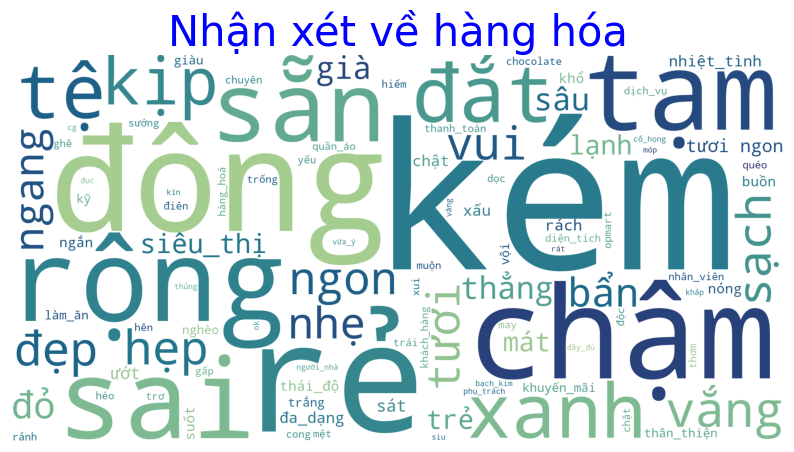

In [ ]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = " ".join(h_a)


# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('Nhận xét về hàng hóa', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()


In [ ]:
# Bước 2: Đếm tần suất
h_counts = Counter(h_a)

# In kết quả
print(h_counts)

Counter({'kém': 82, 'rẻ': 42, 'đông': 36, 'chậm': 29, 'rộng': 27, 'sai': 25, 'tạm': 24, 'tươi': 19, 'ngon': 19, 'sẵn': 19, 'đắt': 18, 'xanh': 16, 'kịp': 16, 'vắng': 14, 'tệ': 14, 'sạch': 13, 'hẹp': 13, 'đẹp': 13, 'vui': 12, 'nhẹ': 11, 'ngang': 10, 'bẩn': 9, 'đỏ': 8, 'thẳng': 8, 'sâu': 8, 'già': 8, 'trẻ': 7, 'lạnh': 7, 'sát': 6, 'siêu_thị': 6, 'mát': 6, 'ướt': 6, 'chật': 5, 'nhiệt_tình': 5, 'rách': 5, 'đa_dạng': 5, 'xấu': 5, 'suốt': 4, 'buồn': 4, 'nóng': 4, 'ngắn': 4, 'khổ': 4, 'trắng': 3, 'giàu': 3, 'kỹ': 3, 'thái_độ': 3, 'vội': 3, 'nghèo': 3, 'làm_ăn': 3, 'cong': 2, 'chuyên': 2, 'yếu': 2, 'gấp': 2, 'hiếm': 2, 'rảnh': 2, 'mệt': 2, 'dọc': 2, 'xui': 2, 'diện_tích': 2, 'quéo': 2, 'sướng': 2, 'thanh_toán': 2, 'trái': 2, 'độc': 2, 'opmart': 2, 'chocolate': 2, 'chặt': 2, 'trơ': 2, 'dịch_vụ': 2, 'muộn': 2, 'thân_thiện': 2, 'ghê': 2, 'hên': 2, 'héo': 2, 'may': 2, 'trống': 2, 'thơm': 2, 'hàng_hoá': 2, 'khách_hàng': 2, 'quần_áo': 2, 'người_nhà': 1, 'cg': 1, 'đục': 1, 'vàng': 1, 'thái_độ tệ': 1, 

## GỬI

In [ ]:
gui = df3[df3.apply(wt).apply(lambda tokens: "gửi" in tokens or "gởi" in tokens or "giữ" in tokens)]
gui

6        hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài ...
21       thái độ dịch vụ ở đây rất tệ từ giữ xe đến bảo vệ đến thu ngân và ...
49       vào mua đồ p gửi xe thu không chiếc ô tô xe đã vào ô ngăn nắp vẫn ...
65       dịch vụ gửi xe rất tệ sáng hôm nay mình gửi xe trong siêu thị vừa ...
76       coôp mart cống quỳnh không to lắm nhưng đầy đủ các mặt hàng nhưng ...
                                         ...                                  
30665            khá lâu đời có rạp phim đầy đủ dịch vụ bãi giữ xe bánh xe máy
31213                                     đây la siêu thị phải trả tiền gửi xe
31218                                      rộng rải mat me bãi giữ xe rộng rải
31397    địa điểm mua hàng hoá tốt tuy nhiên về thiết kế tầng tách biệt mua...
31447                      nhìn chung là tốt nhưng chưa hài lòng về bãi gửi xe
Name: comment, Length: 1152, dtype: object

In [ ]:
for idx, comment in gui.head(10).items():
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')


Bình luận: hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài tấm hình cho em sau đó em lại quầy cân hoa qủa chị nhân viên rất thái độ với em bạn em mới bảo nãy chụp hình c ấy nhìn nhìn kiểu liếc liếc em thắc mắc siêu thị cấm chụp hình ạ mà em chụp em cũng mua đòồ mà mắc gì thái độ với em cân cũng không nói đưa thì liếc bỉu môi omg tụt mood kinh khủng tiếp theo là em mua lốc sữa fami thấy giá để có khuyến mãi nhưng tính tiền không có em tính trên lầu xuống trệt hỏi em lại hỏi nhân viên thì anh đó bảo sai rồi kiu anh khác đi lấy cái gì đó ay làm gì đó em không biết bắt em đợi cỡ không nói câu nào em tính về rồi thì anh kia ra gửi lại tiền cho em kêu em ký tên gì đó rồi em tính tiền lại đi về hoàn toàn không nhận được lời xin lỗi nào đề nghị đào tạo lại tất cả nhân viên ở đây khâu chăm sóc khách hàng nhé thất vọng
---------------------------------------------------------------------------
Bình luận: thái độ dịch vụ ở đây rất tệ từ giữ xe đến bảo vệ đến thu ngân và nhân viê

In [ ]:
gui = gui.apply(wt)
gui = gui.apply(remove_stopwords)


In [ ]:
# dùng hàm pos_tag để phân biệt đâu là danh từ, động từ, tính từ, ...
pos_g = []
for i in gui:
  pos = pos_tag(str(i))
  pos_g.append(pos)

In [ ]:
# lọc ra các tính từ
g_a = []

for sentence in pos_g:
    for word, tag in sentence:
        if tag == 'A' :
            g_a.append(word)
g_a


['sai',
 'kém',
 'người_nhà',
 'quỳnh',
 'siêu_thị',
 'đắt',
 'cg',
 'muộn',
 'trần',
 'đục',
 'nhẹ',
 'ngược',
 'rộng',
 'đắt',
 'đông',
 'rộng',
 'đắt',
 'đa_dạng',
 'chuyên',
 'rộng',
 'tươi',
 'ngon',
 'rộng',
 'rộng',
 'sai',
 'kém',
 'ngắn',
 'bạch_kim',
 'nhanh_chóng',
 'sai',
 'sai',
 'đầy_đủ',
 'thông thang_cuốn',
 'tạm',
 'đầy_đủ',
 'tạm',
 'hài_lòng',
 'rộng',
 'xanh',
 'kịp',
 'đắt',
 'mát',
 'củng tàm_tạm',
 'siêu_thị',
 'rẻ',
 'rộng',
 'sẵn',
 'mát',
 'rộng',
 'hậu_giang',
 'già',
 'đông',
 'đông',
 'rát',
 'móp',
 'thiếu_hụt',
 'bẩn',
 'đắt',
 'chật',
 'chật',
 'siêu_thị',
 'trái',
 'đông',
 'rộng',
 'đông',
 'chặt',
 'gởi',
 'phong_phú',
 'chặt',
 'hẹp',
 'rộng',
 'đông',
 'rộng',
 'trẻ',
 'già',
 'mát',
 'chậm',
 'nhẹ',
 'rộng',
 'chậm',
 'rộng',
 'kín',
 'sạch',
 'rẻ',
 'nhiệt_tình',
 'bất_tiện',
 'rộng',
 'kinh_doanh',
 'hẹp',
 'im',
 'hiếm',
 'chuyên',
 'yếu',
 'rẻ',
 'hoàn_mỹ',
 'vắng',
 'tiện_nghi',
 'đắt',
 'tạm',
 'tấp dô',
 'khu_vực',
 'kém',
 'kém',
 'đông',
 

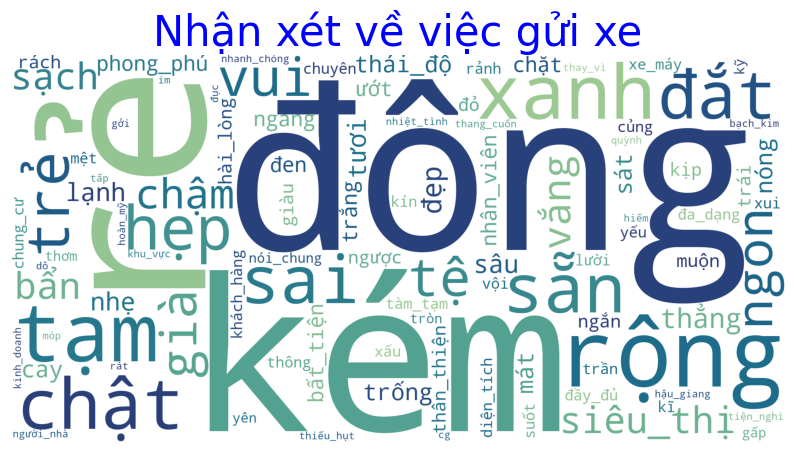

In [ ]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = " ".join(g_a)


# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('Nhận xét về việc gửi xe', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()


In [ ]:
# Bước 2: Đếm tần suất
g_counts = Counter(g_a)

# In kết quả
print(g_counts)

Counter({'đông': 39, 'kém': 35, 'rẻ': 34, 'rộng': 32, 'tạm': 23, 'xanh': 20, 'chật': 20, 'sẵn': 19, 'sai': 18, 'đắt': 18, 'hẹp': 15, 'trẻ': 14, 'vui': 11, 'ngon': 10, 'già': 10, 'chậm': 9, 'vắng': 8, 'tệ': 8, 'siêu_thị': 7, 'bẩn': 7, 'thẳng': 7, 'nhẹ': 6, 'tươi': 6, 'sạch': 6, 'lạnh': 6, 'đẹp': 6, 'sâu': 6, 'mát': 5, 'cay': 5, 'sát': 5, 'thái_độ': 5, 'trống': 5, 'nóng': 5, 'chặt': 4, 'phong_phú': 4, 'bất_tiện': 4, 'ngang': 4, 'trắng': 4, 'đen': 4, 'ướt': 4, 'muộn': 3, 'ngược': 3, 'ngắn': 3, 'hài_lòng': 3, 'kịp': 3, 'trái': 3, 'giàu': 3, 'đỏ': 3, 'nhân_viên': 3, 'thân_thiện': 3, 'rách': 3, 'trần': 2, 'đa_dạng': 2, 'chuyên': 2, 'đầy_đủ': 2, 'củng tàm_tạm': 2, 'kín': 2, 'yếu': 2, 'rảnh': 2, 'kĩ': 2, 'lười': 2, 'khách_hàng': 2, 'vội': 2, 'xui': 2, 'xấu': 2, 'xe_máy': 2, 'suốt': 2, 'diện_tích': 2, 'mệt': 2, 'nói_chung': 2, 'gấp': 2, 'kỹ': 2, 'yên': 2, 'thơm': 2, 'tròn': 2, 'người_nhà': 1, 'quỳnh': 1, 'cg': 1, 'đục': 1, 'bạch_kim': 1, 'nhanh_chóng': 1, 'thông thang_cuốn': 1, 'hậu_giang': 1, 